In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd


df = pd.read_parquet("C:/Users/VENKAT VALETI/Downloads/FALL SEMESTER 2024-25/STATISTICS FOR DATA ANALYSTS/Project TAXI DATA/yellow_tripdata_2024-01 (1).parquet")
df.to_csv('taxi.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [5]:
df.describe()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,2.964624e+06,2964624,2964624,2.824462e+06,2.964624e+06,2.824462e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.824462e+06,2.824462e+06
mean,1.754204e+00,2024-01-17 00:46:36.431092,2024-01-17 01:02:13.208130,1.339281e+00,3.652169e+00,2.069359e+00,1.660179e+02,1.651167e+02,1.161271e+00,1.817506e+01,1.451598e+00,4.833823e-01,3.335870e+00,5.270212e-01,9.756319e-01,2.680150e+01,2.256122e+00,1.411611e-01
min,1.000000e+00,2002-12-31 22:59:39,2002-12-31 23:05:41,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-8.990000e+02,-7.500000e+00,-5.000000e-01,-8.000000e+01,-8.000000e+01,-1.000000e+00,-9.000000e+02,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,2024-01-09 15:59:19.750000,2024-01-09 16:16:23,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.538000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2024-01-17 10:45:37.500000,2024-01-17 11:03:51.500000,1.000000e+00,1.680000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.700000e+00,0.000000e+00,1.000000e+00,2.010000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2024-01-24 18:23:52.250000,2024-01-24 18:40:29,1.000000e+00,3.110000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.120000e+00,0.000000e+00,1.000000e+00,2.856000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2024-02-01 00:01:15,2024-02-02 13:56:52,9.000000e+00,3.127223e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,5.000000e+03,1.425000e+01,4.000000e+00,4.280000e+02,1.159200e+02,1.000000e+00,5.000000e+03,2.500000e+00,1.750000e+00
std,4.325902e-01,NaN,NaN,8.502817e-01,2.254626e+02,9.823219e+00,6.362391e+01,6.931535e+01,5.808686e-01,1.894955e+01,1.804102e+00,1.177600e-01,3.896551e+00,2.128310e+00,2.183645e-01,2.338558e+01,8.232747e-01,4.876239e-01


In [6]:
# Import necessary libraries
import pandas as pd



# Generate descriptive summary
def generate_description(df):
    description = df.describe()
    narrative = []

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            col_desc = description[column]
            narrative.append(
                f"The column '{column}' has a mean of {col_desc['mean']:.2f}, "
                f"a minimum value of {col_desc['min']:.2f}, and a maximum value of {col_desc['max']:.2f}. "
                f"The standard deviation is {col_desc['std']:.2f}, and the interquartile range lies "
                f"between {col_desc['25%']:.2f} (25th percentile) and {col_desc['75%']:.2f} (75th percentile)."
            )
    return "\n".join(narrative)

# Generate the description
summary_description = generate_description(df)
print(summary_description)


The column 'VendorID' has a mean of 1.75, a minimum value of 1.00, and a maximum value of 6.00. The standard deviation is 0.43, and the interquartile range lies between 2.00 (25th percentile) and 2.00 (75th percentile).
The column 'passenger_count' has a mean of 1.34, a minimum value of 0.00, and a maximum value of 9.00. The standard deviation is 0.85, and the interquartile range lies between 1.00 (25th percentile) and 1.00 (75th percentile).
The column 'trip_distance' has a mean of 3.65, a minimum value of 0.00, and a maximum value of 312722.30. The standard deviation is 225.46, and the interquartile range lies between 1.00 (25th percentile) and 3.11 (75th percentile).
The column 'RatecodeID' has a mean of 2.07, a minimum value of 1.00, and a maximum value of 99.00. The standard deviation is 9.82, and the interquartile range lies between 1.00 (25th percentile) and 1.00 (75th percentile).
The column 'PULocationID' has a mean of 166.02, a minimum value of 1.00, and a maximum value of 26

In [7]:
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64

In [8]:
print("\n---- Summary Statistics (Categorical Columns) ----")
print(df.describe(include=['object']))


---- Summary Statistics (Categorical Columns) ----
       store_and_fwd_flag
count             2824462
unique                  2
top                     N
freq              2813126


In [9]:
# replacing the values of Y an N of categorical variable to the values of 1 and 2 respectively
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace('Y', 1)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace('N', 2)

C:\Users\VENKAT VALETI\AppData\Local\Temp\ipykernel_1832\2478039076.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace('N', 2)


In [10]:
#Check for duplicates 
print("\n---- Duplicate Rows ----")
duplicates = df.duplicated()
print(f"Number of Duplicate Rows: {duplicates}")


---- Duplicate Rows ----
Number of Duplicate Rows: 0          False
1          False
2          False
3          False
4          False
           ...  
2964619    False
2964620    False
2964621    False
2964622    False
2964623    False
Length: 2964624, dtype: bool


In [11]:
# Handle missing values
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].mean())
df['Airport_fee'] = df['Airport_fee'].fillna(df['Airport_fee'].mean())

print("Missing values handled and data transformed.")


Missing values handled and data transformed.


In [12]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

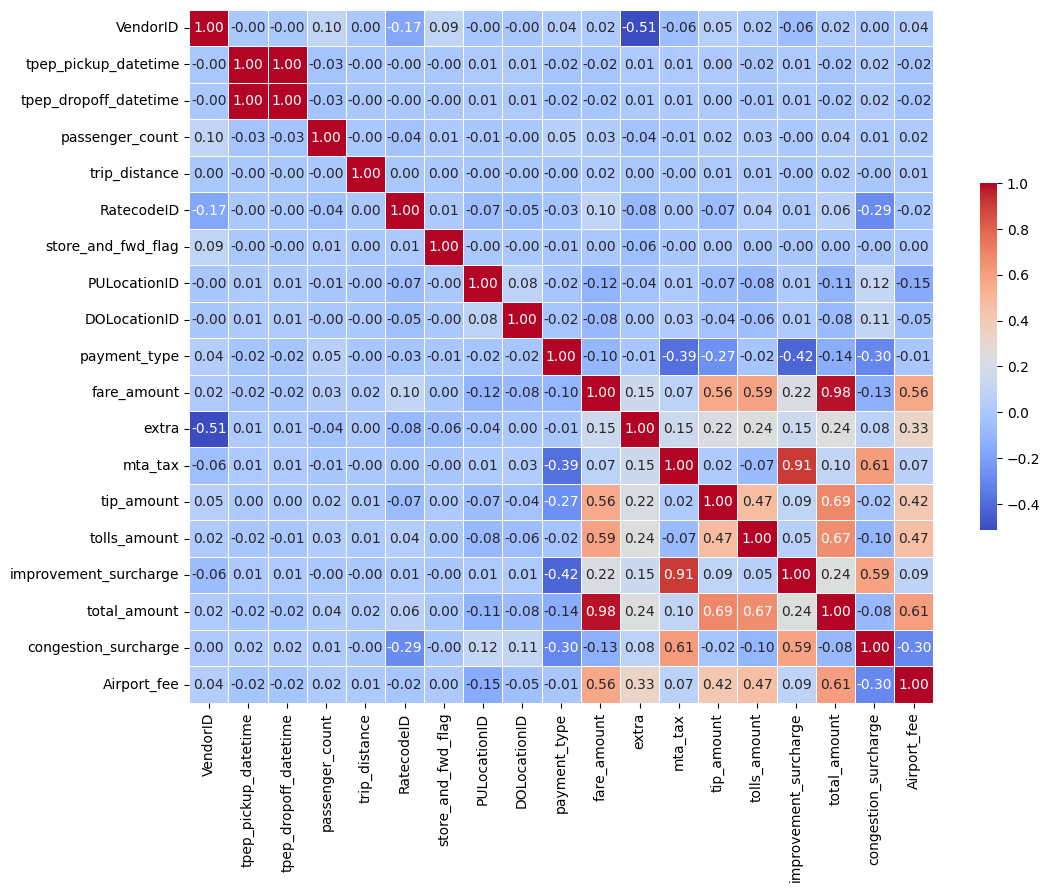

In [13]:
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cbar_kws={"shrink": .5})

# Show plot
plt.show()

In [14]:
# Distribution of passenger count
passenger_count_dist = df['passenger_count'].value_counts()
print(passenger_count_dist)

passenger_count
1.0    2328901
2.0     405103
3.0      91262
4.0      51974
5.0      33506
0.0      31465
6.0      22353
8.0         51
7.0          8
9.0          1
Name: count, dtype: int64


Outliers found in trip_distance: 382745
Outliers found in fare_amount: 318801
Outliers found in extra: 47566
Outliers found in mta_tax: 64150
Outliers found in tip_amount: 216756
Outliers found in tolls_amount: 210815
Outliers found in total_amount: 363621
Outliers found in congestion_surcharge: 386869
Outliers found in Airport_fee: 377835


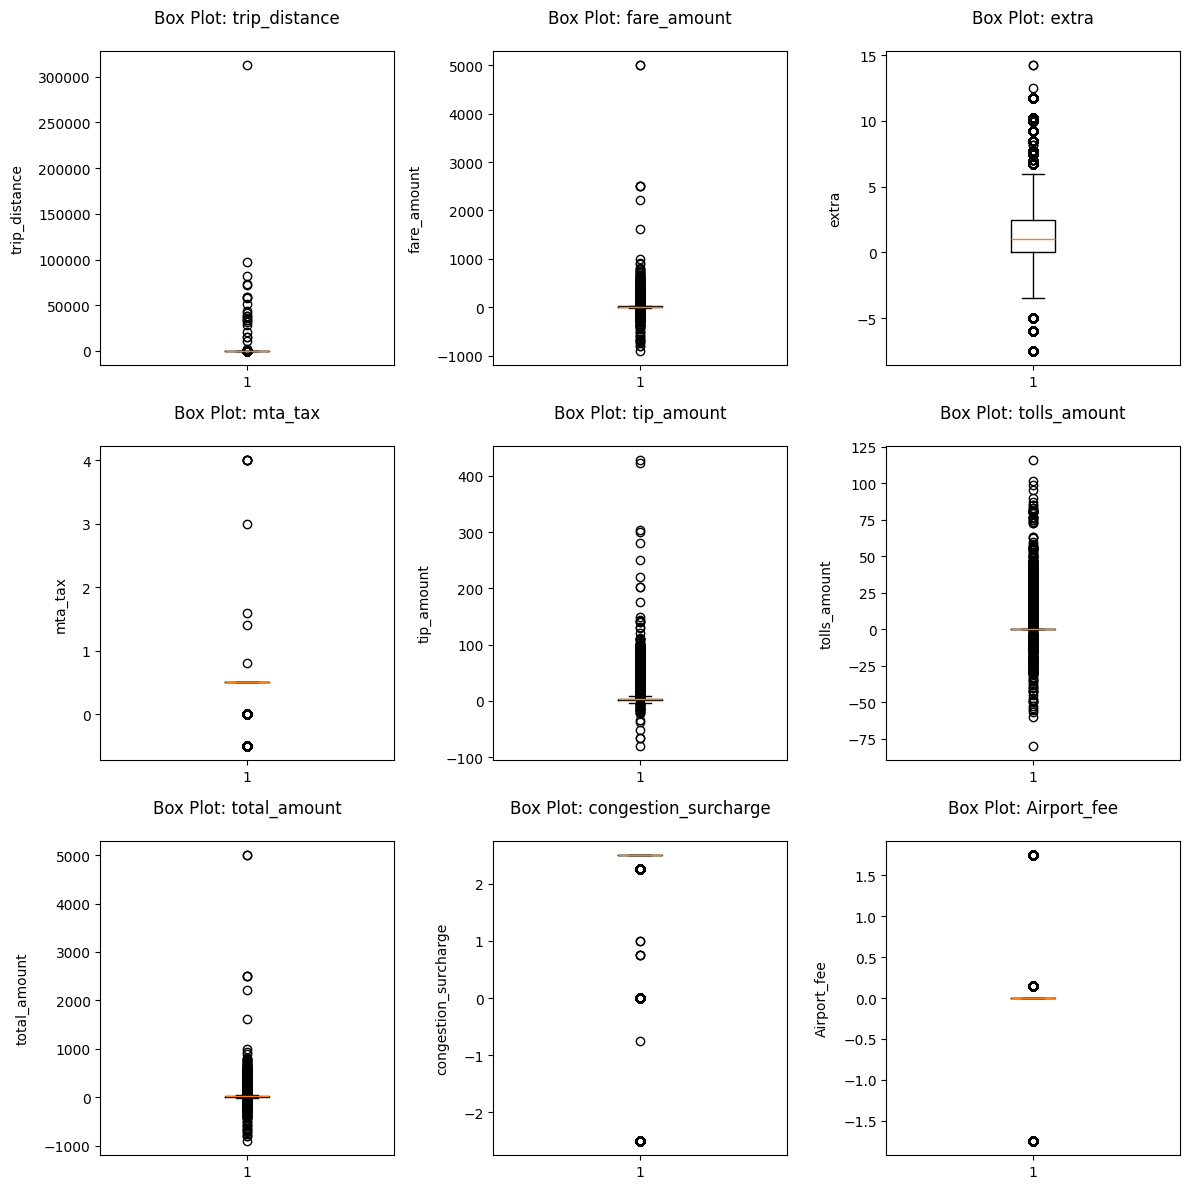

In [15]:

# Create a function to identify outliers using the Interquartile Range (IQR) method
def find_outliers_with_iqr(dataframe, feature):
    q1, q3 = dataframe[feature].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr
    return dataframe[(dataframe[feature] < lower_threshold) | (dataframe[feature] > upper_threshold)]

# List of numeric features to analyze for outliers
numeric_features = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                    'tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee']

# Identify outliers for each numeric feature
outlier_results = {}
for feature in numeric_features:
    outlier_results[feature] = find_outliers_with_iqr(df, feature)

# Display the count of outliers for each feature
for feature, outliers in outlier_results.items():
    print(f"Outliers found in {feature}: {len(outliers)}")

# Create a grid of box plots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()  # Flatten the 2D array of axes

for idx, feature in enumerate(numeric_features):
    axes[idx].boxplot(df[feature])
    axes[idx].set_title(f'Box Plot: {feature}', pad=20)
    axes[idx].set_ylabel(feature, labelpad=10)

plt.tight_layout()
plt.show()


In [55]:
# import numpy as np
# import pandas as pd

# # Define the columns that have outliers
# columns_with_outliers = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 
#                          'tip_amount', 'tolls_amount', 'total_amount', 
#                          'congestion_surcharge', 'Airport_fee']

# # Apply Winsorization
# for column in columns_with_outliers:
#     # Compute the lower and upper bounds (1st and 99th percentiles)
#     lower_bound = np.percentile(df[column], 1)
#     upper_bound = np.percentile(df[column], 99)
    
#     # Cap the values that are outside the bounds
#     df[column] = np.clip(df[column], lower_bound, upper_bound)

# # Now the outliers are capped


In [24]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day', 'peak_demand'],
      dtype='object')

## Visualizations for Hypothesis 1

### Hour-wise Demand Distribution (Peak Demand):
### This will show the demand distribution during each hour of the day, which will help identify peak hours, such as 7-9 AM and 5-7 PM.

C:\Users\VENKAT VALETI\AppData\Local\Temp\ipykernel_5836\2943283847.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=df, palette='coolwarm')


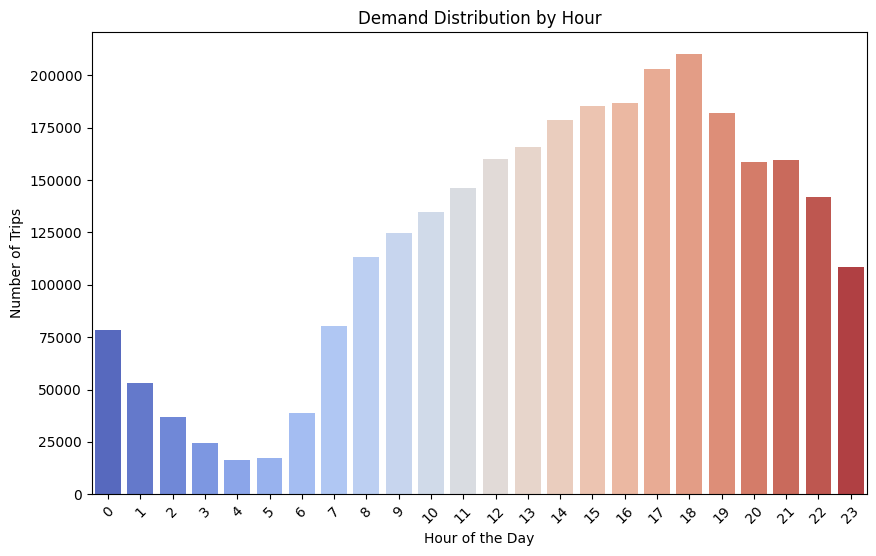

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour and day of the week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Plot the demand by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=df, palette='coolwarm')
plt.title("Demand Distribution by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()


###  Weekday vs Weekend Demand (Peak Demand):
### This plot will show if there's a significant difference in demand between weekdays and weekends.

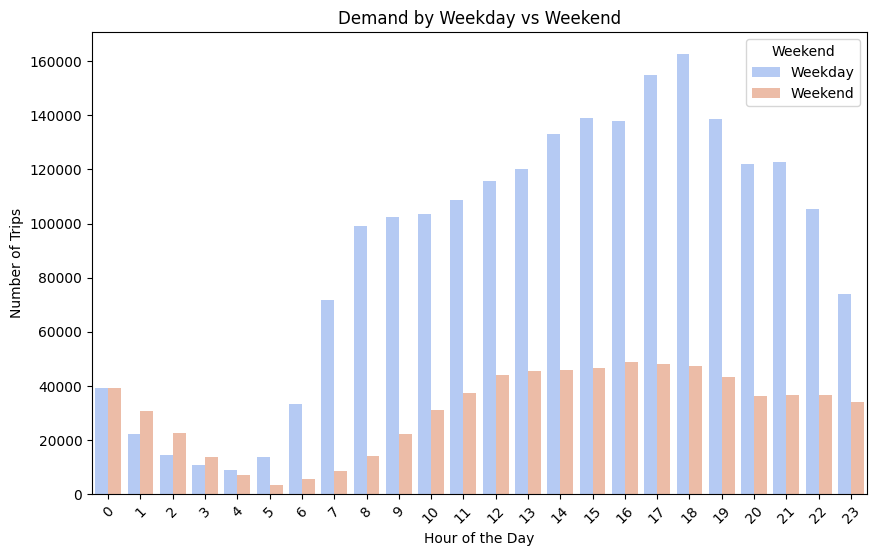

In [70]:
# Create a new column for 'weekend' (1 = Weekend, 0 = Weekday)
df['is_weekend'] = df['pickup_day'].apply(lambda x: 1 if x >= 5 else 0)

# Plot the demand for weekdays vs weekends
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', hue='is_weekend', data=df, palette='coolwarm')
plt.title("Demand by Weekday vs Weekend")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.legend(title='Weekend', labels=['Weekday', 'Weekend'])
plt.show()


## Visualizations For Hypothesis 2

### 3. Demand by Pickup Location (Location-Based Demand):
### This will show the demand (number of trips) for each pickup location.

C:\Users\VENKAT VALETI\AppData\Local\Temp\ipykernel_5836\2147862329.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PULocationID', data=df, palette='coolwarm')


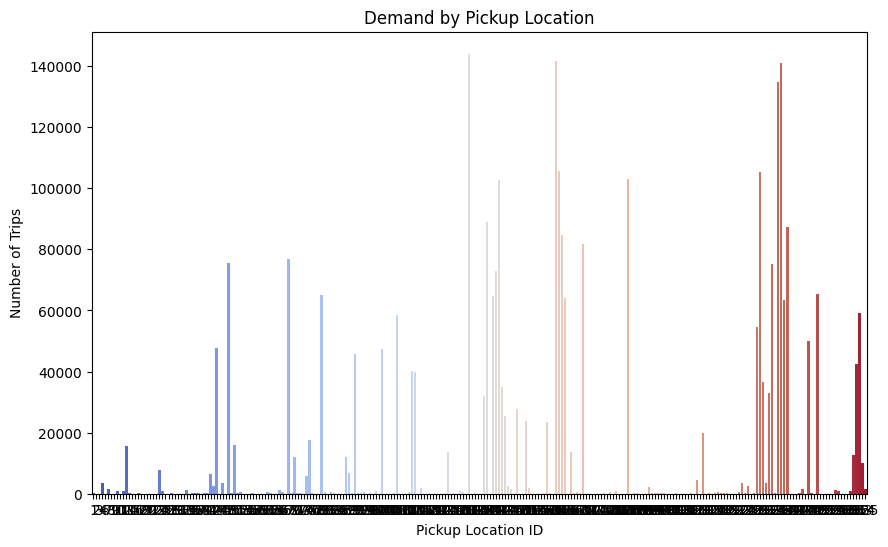

In [71]:
# Plot the demand by pickup location
plt.figure(figsize=(10, 6))
sns.countplot(x='PULocationID', data=df, palette='coolwarm')
plt.title("Demand by Pickup Location")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Trips")
plt.show()


### 4. Heatmap with Agglomeration (Clustering)
4. Heatmap with Agglomeration (Clustering)
You can try clustering locations based on their demand patterns and 
plot the clustered locations. This could involve techniques like K-means clustering or 
Hierarchical clustering to group locations with similar demand trends.

C:\Users\VENKAT VALETI\AppData\Local\Temp\ipykernel_5836\3656859544.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = df.groupby(['pickup_hour', 'PULocationID']).size().unstack(fill_value=0)


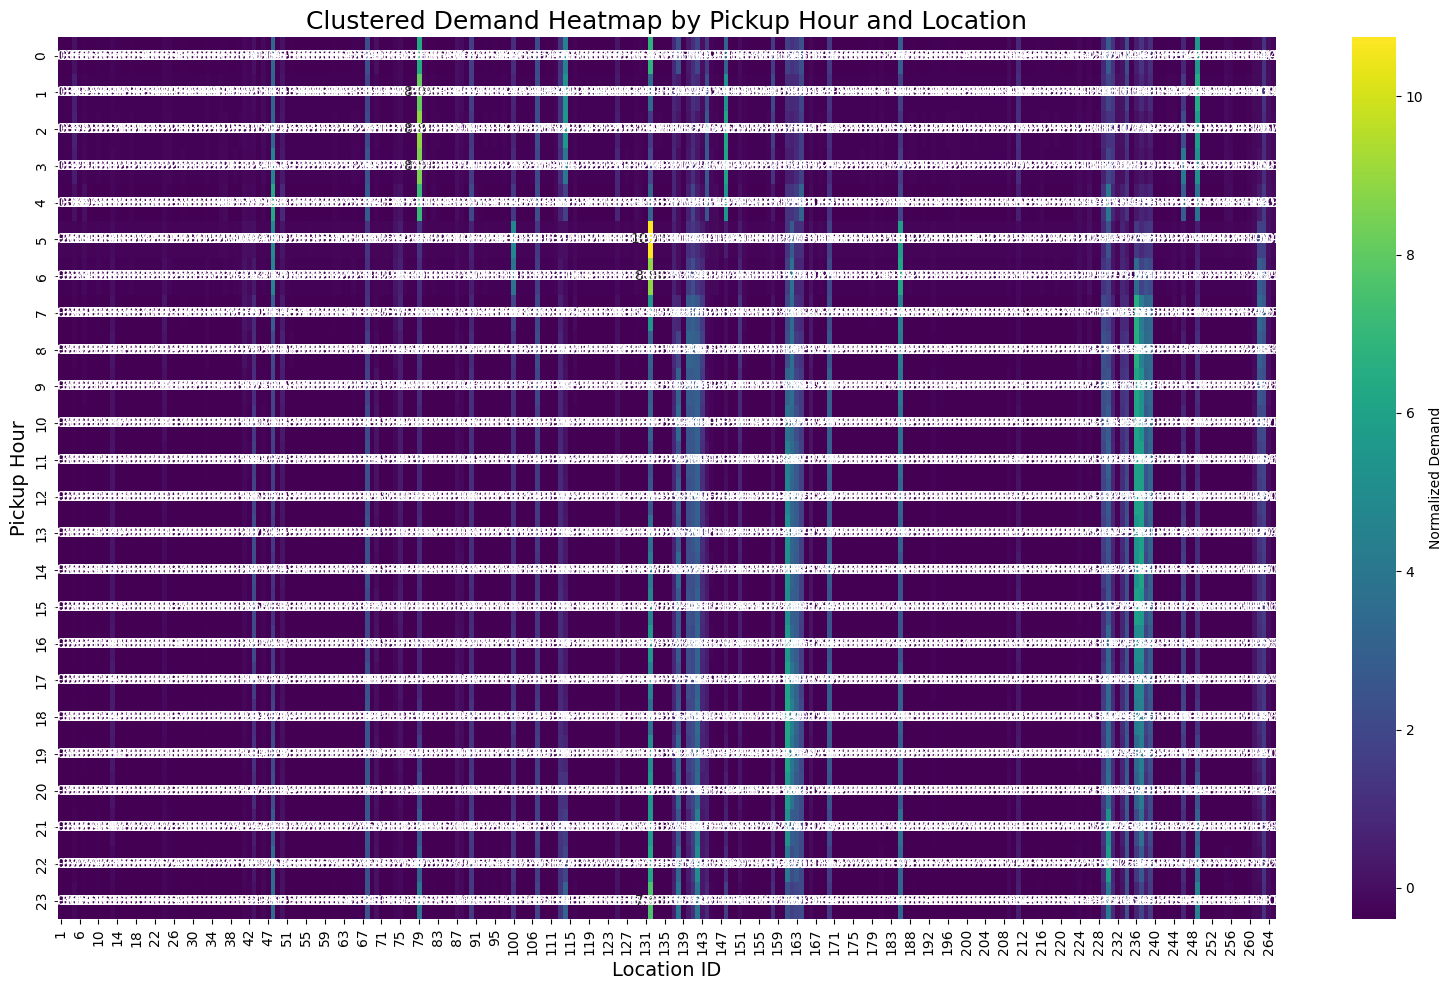

In [86]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data: Pivot to get demand by hour for each location
pivot_data = df.groupby(['pickup_hour', 'PULocationID']).size().unstack(fill_value=0)

# Normalize the data (optional, based on your preferences)
pivot_data_normalized = pivot_data.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

# Perform K-means clustering on the normalized data
kmeans = KMeans(n_clusters=10, random_state=42)  # Set the number of clusters
pivot_data_normalized['Cluster'] = kmeans.fit_predict(pivot_data_normalized)

# Plot the demand grouped by clusters
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_data_normalized.drop('Cluster', axis=1), cmap='viridis', annot=True, fmt='.2f', cbar_kws={'label': 'Normalized Demand'})

plt.title('Clustered Demand Heatmap by Pickup Hour and Location', fontsize=18)
plt.xlabel('Location ID', fontsize=14)
plt.ylabel('Pickup Hour', fontsize=14)

plt.tight_layout()
plt.show()



### 5. Using PCA for Dimensionality Reduction
Another approach could involve using Principal Component Analysis (PCA) to reduce the dimensionality of the demand data and project it into two or three dimensions for a more interpretable visualization. This way, you can visualize the most significant features that explain demand variations across locations.

6. Top N Hours of Demand
Rather than focusing on Location IDs, focus on the top N hours of demand, which will condense your data. You can plot the hours with the highest demand, irrespective of the locations.

## Hypothesis 1

In [28]:
# Extract hour of the day and day of the week from pickup datetime
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.dayofweek  # Monday=0, Sunday=6

# Create target variable 'peak_demand'
df['peak_demand'] = ((df['pickup_hour'] >= 7) & (df['pickup_hour'] <= 9)) | \
                    ((df['pickup_hour'] >= 17) & (df['pickup_hour'] <= 19)) | \
                    ((df['pickup_day'] >= 5) & (df['pickup_hour'] >= 20) & (df['pickup_hour'] <= 23))
df['peak_demand'] = df['peak_demand'].astype(int)  # Convert boolean to integer

# Define features and target variable
X = df[['pickup_hour', 'pickup_day']]
y = df['peak_demand']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


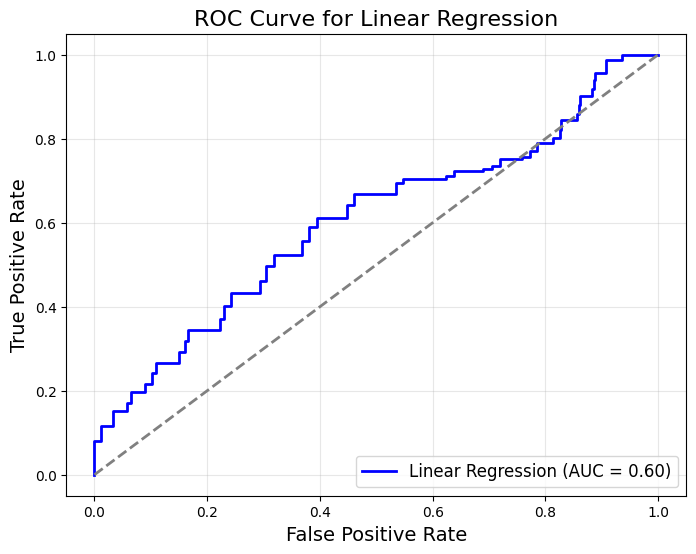

Linear Regression - MSE: 0.22, R²: 0.03, AUC: 0.60


In [20]:
# Importing libraries for visualization
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions for Linear Regression
y_pred = linear_model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate the ROC Curve and AUC for Linear Regression
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Linear Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Linear Regression', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Displaying evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse:.2f}, R²: {r2:.2f}, AUC: {roc_auc:.2f}")



Logistic Regression - Accuracy: 0.61, ROC-AUC: 0.61
Confusion Matrix:
[[217210 160694]
 [ 71056 143965]]
Accuracy: 0.61

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.57      0.65    377904
           1       0.47      0.67      0.55    215021

    accuracy                           0.61    592925
   macro avg       0.61      0.62      0.60    592925
weighted avg       0.65      0.61      0.62    592925



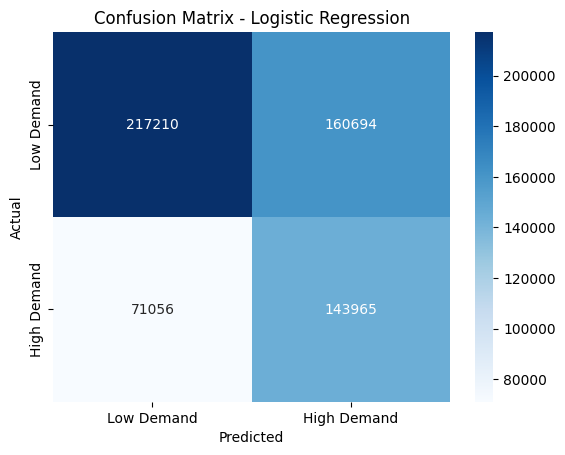

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score


# Logistic Regression
logistic_model = LogisticRegression(class_weight='balanced', random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Logistic Regression - Accuracy: {accuracy:.2f}, ROC-AUC: {roc_auc:.2f}")

from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
class_report = classification_report(y_test, y_pred)


print("\nClassification Report:")
print(class_report)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Low Demand", "High Demand"], yticklabels=["Low Demand", "High Demand"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest - Accuracy: 1.00, ROC-AUC: 1.00
Accuracy: 0.9984877241428938
Confusion Matrix:
 [[  3347   1230]
 [   115 884696]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.83      4577
           1       1.00      1.00      1.00    884811

    accuracy                           1.00    889388
   macro avg       0.98      0.87      0.92    889388
weighted avg       1.00      1.00      1.00    889388



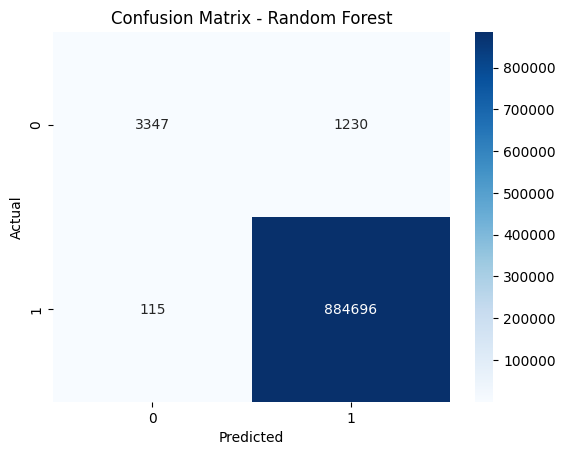

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Random Forest - Accuracy: {accuracy:.2f}, ROC-AUC: {roc_auc:.2f}")

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.6091411224016529
Confusion Matrix:
 [[217210 160694]
 [ 71056 143965]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.57      0.65    377904
           1       0.47      0.67      0.55    215021

    accuracy                           0.61    592925
   macro avg       0.61      0.62      0.60    592925
weighted avg       0.65      0.61      0.62    592925



## Hypothesis 2

In [22]:
# Select relevant columns for analysis (e.g., 'pickup_location_id', 'pickup_hour')
X = df[['PULocationID', 'pickup_hour']]  # PULocationID: Pickup Location ID
y = df.groupby('PULocationID')['trip_distance'].transform('mean')  # Proxy for demand

# Encode categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['PULocationID']])

# Combine encoded location with hour feature
X_combined = np.hstack([X_encoded.toarray(), X[['pickup_hour']].values])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse:.2f}, R^2: {r2:.2f}")


Linear Regression - MSE: 0.00, R^2: 1.00


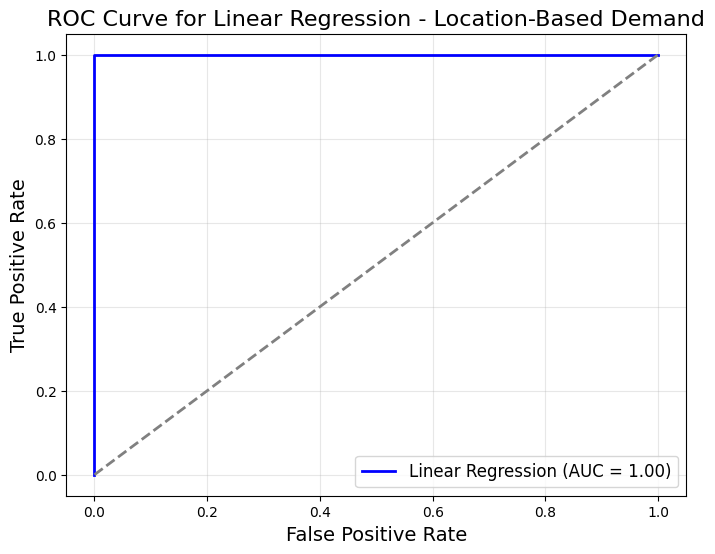

Linear Regression - MSE: 0.00, R²: 1.00, AUC: 1.00


In [25]:
# Convert y_test to binary for the classification task
y_test_binary = (y_test >= 0.5).astype(int)  # Convert the continuous y_test to binary

# Calculate the ROC Curve and AUC for Linear Regression (using binary predictions)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)  # Using binary values for both
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Linear Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Linear Regression - Location-Based Demand', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Displaying evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse:.2f}, R²: {r2:.2f}, AUC: {roc_auc:.2f}")


Accuracy: 0.6669

Confusion Matrix:
[[  1027    570]
 [192920 386377]]

Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.64      0.01      1597
           1       1.00      0.67      0.80    579297

    accuracy                           0.67    580894
   macro avg       0.50      0.66      0.41    580894
weighted avg       1.00      0.67      0.80    580894



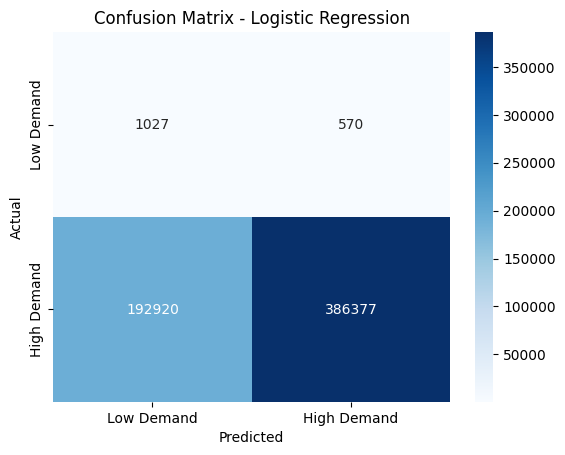

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with actual file or dataframe)
# df = pd.read_csv('your_dataset.csv')

# Convert 'tpep_pickup_datetime' to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract features: hour of the day and day of the week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Calculate the number of trips per hour-location combination
trip_counts = df.groupby(['PULocationID', 'pickup_hour']).size()

# Calculate the median trip count across all hour-location combinations
median_demand = trip_counts.median()

# Assign high demand (1) or low demand (0) based on whether the trip count exceeds the median
df['high_demand'] = df.apply(
    lambda row: 1 if trip_counts.get((row['PULocationID'], row['pickup_hour']), 0) > median_demand else 0,
    axis=1
)

# Select relevant features for the model
X = df[['pickup_hour', 'pickup_day', 'PULocationID']]
y = df['high_demand']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')

# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Low Demand", "High Demand"], yticklabels=["Low Demand", "High Demand"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.9985563106315803
Confusion Matrix:
 [[  3412   1165]
 [   119 884692]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.84      4577
           1       1.00      1.00      1.00    884811

    accuracy                           1.00    889388
   macro avg       0.98      0.87      0.92    889388
weighted avg       1.00      1.00      1.00    889388



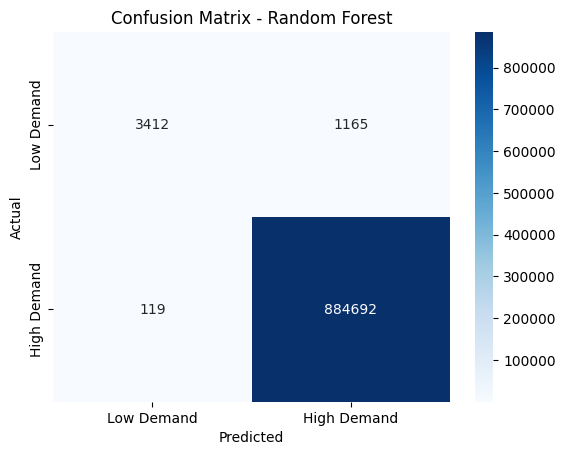

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
# df = pd.read_csv('your_data.csv')  # Replace with actual path to your dataset


# Preprocessing: Create additional features (pickup hour, day, etc.)
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Step 1: Count the number of trips for each (PULocationID, pickup_hour) pair
trip_counts = df.groupby(['PULocationID', 'pickup_hour']).size()

# Step 2: Calculate the median demand
median_demand = trip_counts.median()

# Step 3: Create a dictionary to map the (PULocationID, pickup_hour) to high demand
high_demand_dict = (trip_counts > median_demand).astype(int)

# Step 4: Map the high_demand values to the original dataframe
df['high_demand'] = df.apply(lambda row: high_demand_dict.get((row['PULocationID'], row['pickup_hour']), 0), axis=1)

# Select relevant features for the model
X = df[['pickup_hour', 'pickup_day', 'PULocationID']]  # Use other features as needed

# Define the target variable (high_demand)
y = df['high_demand']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 8: Make predictions on the test data
y_pred = rf_model.predict(X_test_scaled)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Low Demand", "High Demand"], yticklabels=["Low Demand", "High Demand"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()